In [13]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report

# Specify dataset paths
train_path = '/kaggle/input/gujarati-language-hand-signs/data/train'
test_path = '/kaggle/input/gujarati-language-hand-signs/data/test'

# Define class labels
classes = {
    'ka': 0, 'kha': 1, 'ga': 2, 'gha': 3, 'cha': 4, 'chha': 5, 'ja': 6, 'za': 7, 'ta': 8, 'tha': 9,
    'dda': 10, 'dhha': 11, 'nna': 12, 'ta': 13, 'tha': 14, 'da': 15, 'dha': 16, 'na': 17, 'pa': 18,
    'fa': 19, 'ba': 20, 'bha': 21, 'ma': 22, 'ya': 23, 'ra': 24, 'la': 25, 'va': 26, 'sha': 27,
    'sh': 28, 'sa': 29, 'ha': 30, 'lla': 31, 'ksha': 32, 'gna': 33
}

# Load and preprocess images
X = []
Y = []

for cls in classes:
    class_path = os.path.join(train_path, cls)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Load image in color (3 channels)
        img = cv2.resize(img, (64, 64))  # Resize to 64x64 pixels
        X.append(img)
        Y.append(classes[cls])

# Convert lists to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Normalize data
X = X / 255.0  # Normalize pixel values to range [0, 1]

# One-hot encode labels
lb = LabelBinarizer()
Y = lb.fit_transform(Y)


In [14]:
# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=42)


In [15]:
# Define the custom CNN model with adjusted architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),  # This layer flattens the output from the convolutional layers
    Dense(128, activation='relu'),  # Adjusted number of neurons in the Dense layer
    Dropout(0.5),
    Dense(len(classes), activation='softmax')  # Output layer with the number of classes
])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [17]:
# Train the model
cnn_history = model.fit(
    xtrain, ytrain,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping]
)


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.0435 - loss: 3.4666 - val_accuracy: 0.0499 - val_loss: 3.4576
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0538 - loss: 3.4545 - val_accuracy: 0.0619 - val_loss: 3.4437
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0671 - loss: 3.4284 - val_accuracy: 0.0778 - val_loss: 3.4041
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0935 - loss: 3.3846 - val_accuracy: 0.1198 - val_loss: 3.3308
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1033 - loss: 3.3017 - val_accuracy: 0.1577 - val_loss: 3.2353
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1151 - loss: 3.2296 - val_accuracy: 0.1737 - val_loss: 3.1556
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1441 - loss: 3.1449 - val_accuracy: 0.1956 - val_loss: 3.0395
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1553 - loss: 3.0579 - val_accuracy: 0.2635 - val_loss

In [18]:
# Evaluate the model
train_loss, train_accuracy = model.evaluate(xtrain, ytrain)
test_loss, test_accuracy = model.evaluate(xtest, ytest)
print(f"CNN Training Accuracy: {train_accuracy}")
print(f"CNN Testing Accuracy: {test_accuracy}")

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7563 - loss: 1.2126
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6557 - loss: 1.5432
CNN Training Accuracy: 0.735305905342102
CNN Testing Accuracy: 0.6421248912811279


In [19]:
# Predict on test data
y_pred = model.predict(xtest)
y_pred_classes = np.argmax(y_pred, axis=1)
ytest_classes = np.argmax(ytest, axis=1)

# Print the classification report
print("Classification Report:\n", classification_report(ytest_classes, y_pred_classes))


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.66      0.54        38
           1       0.80      0.82      0.81        40
           2       0.68      0.70      0.69        43
           3       0.52      0.78      0.62        36
           4       0.95      0.49      0.64        39
           5       0.76      0.72      0.74        36
           6       0.84      0.84      0.84        32
           7       0.61      0.64      0.62        36
           8       0.71      0.71      0.71        34
           9       0.56      0.96      0.71        25
          10       0.68      0.74      0.71        35
          11       0.60      0.91      0.72        32
          12       0.88      0.16      0.27        43
          13       0.74      0.74      0.74        27
          14       0.83      1.00      0.91        30
          15       0.47      0.72      0.57        29
          16      

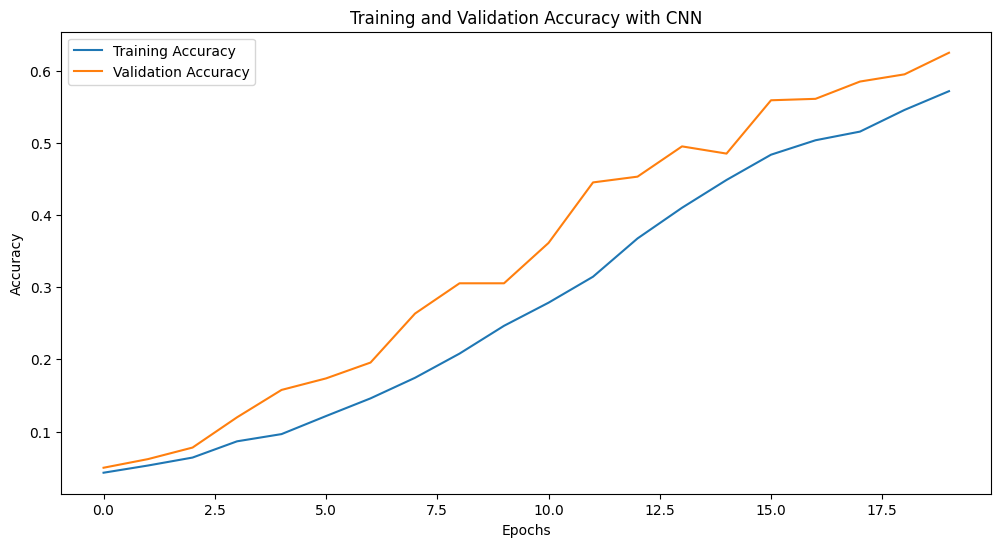

In [20]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy with CNN')
plt.legend()
plt.show()


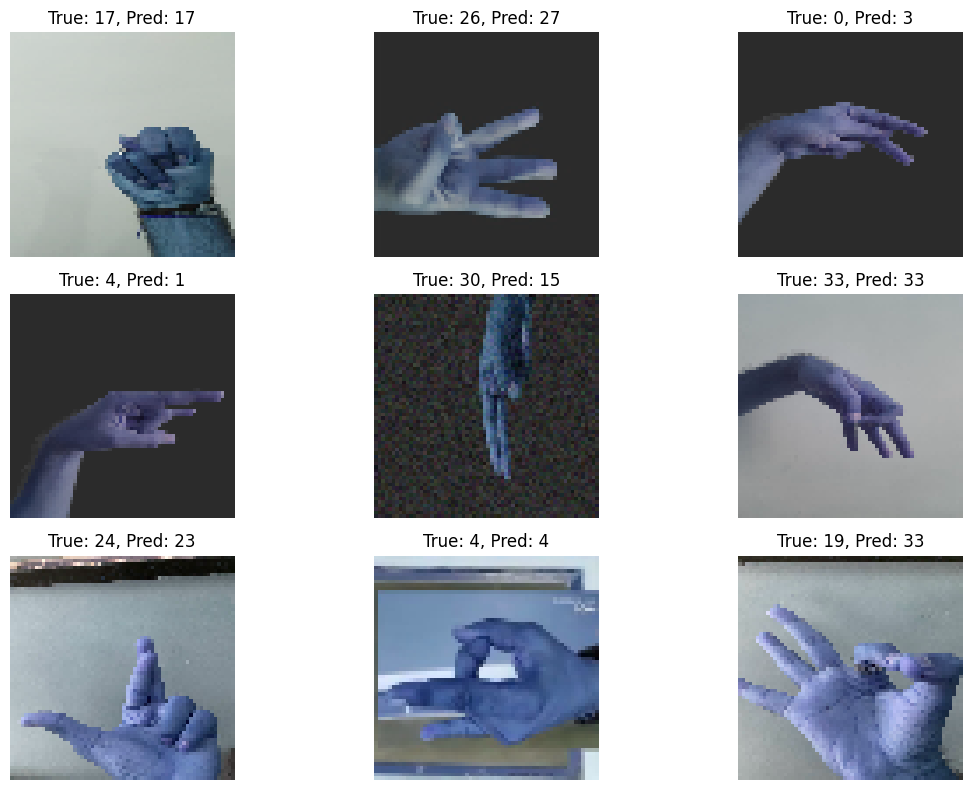

In [21]:
# Visualize some test predictions
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(xtest[i])
    plt.title(f"True: {lb.classes_[ytest_classes[i]]}, Pred: {lb.classes_[y_pred_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()